In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
pd.options.display.max_rows=999

In [2]:
df = pd.read_csv("severe_cases_daily.csv", sep=",")
print(df.shape)
print(df.info())
display(df.head())

(1096, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1096 non-null   object 
 1   ALL        1096 non-null   int64  
 2   Hokkaido   1095 non-null   float64
 3   Aomori     1095 non-null   float64
 4   Iwate      1096 non-null   int64  
 5   Miyagi     1096 non-null   int64  
 6   Akita      1096 non-null   int64  
 7   Yamagata   1096 non-null   int64  
 8   Fukushima  1096 non-null   object 
 9   Ibaraki    1096 non-null   int64  
 10  Tochigi    1096 non-null   int64  
 11  Gunma      1096 non-null   int64  
 12  Saitama    1096 non-null   object 
 13  Chiba      1096 non-null   object 
 14  Tokyo      1096 non-null   int64  
 15  Kanagawa   995 non-null    float64
 16  Niigata    1096 non-null   int64  
 17  Toyama     1096 non-null   int64  
 18  Ishikawa   1096 non-null   int64  
 19  Fukui      1096 non-null   int64  
 2

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,Saitama,Chiba,Tokyo,Kanagawa,Niigata,Toyama,Ishikawa,Fukui,Yamanashi,Nagano,Gifu,Shizuoka,Aichi,Mie,Shiga,Kyoto,Osaka,Hyogo,Nara,Wakayama,Tottori,Shimane,Okayama,Hiroshima,Yamaguchi,Tokushima,Kagawa,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/5/9,248,28.0,0.0,0,0,0,0,0,3,5,2,10,12,83,NaN,0,0,6,3,1,2,1,2,5,0,1,0,56,23,0,0,0,0,0,0,0,0,0,2,0,0,1,0,2,0,0,0,NaN
1,2020/5/10,222,26.0,0.0,0,0,0,0,0,3,5,2,11,12,71,NaN,0,0,6,3,1,2,1,2,0,0,0,0,50,24,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,NaN
2,2020/5/11,248,24.0,0.0,0,0,0,0,0,2,5,2,9,11,65,31.0,0,0,6,3,1,2,1,2,5,0,0,0,50,24,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0,1.0
3,2020/5/12,254,19.0,0.0,0,0,0,2,0,2,5,2,9,12,56,34.0,0,2,5,3,1,2,1,2,4,0,1,3,50,20,0,0,0,1,0,3,0,0,0,0,0,11,1,0,2,0,0,0,1.0
4,2020/5/13,241,18.0,0.0,0,0,0,2,2,2,5,2,9,11,52,34.0,0,2,3,3,1,2,1,2,4,0,1,3,45,21,0,0,0,1,0,1,1,0,0,0,0,11,0,0,1,0,0,0,1.0


### 2.

In [3]:
df_all = df[["Date", "ALL"]].copy()
display(df_all.head())

,Date,ALL
0,2020/5/9,248
1,2020/5/10,222
2,2020/5/11,248
3,2020/5/12,254
4,2020/5/13,241


### 3. 

In [4]:
df_all["Date"] = pd.to_datetime(df_all["Date"])
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1096 non-null   datetime64[ns]
 1   ALL     1096 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.2 KB
None


### 4.

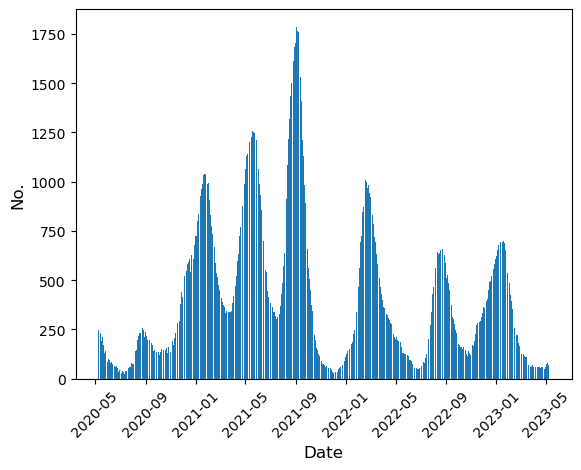

In [5]:
plt.bar(df_all["Date"], df_all["ALL"])
plt.xlabel("Date", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("No.", fontsize=12)
plt.show()

### 5.

In [6]:
df_all=df_all.set_index("Date")
display(df_all.head())

,ALL
Date,
2020-05-09,248
2020-05-10,222
2020-05-11,248
2020-05-12,254
2020-05-13,241


### 6.

In [7]:
df_all_rolling7 = df_all.resample("W").mean()
display(df_all_rolling7.head())

,ALL
Date,
2020-05-10,235.000000
2020-05-17,226.857143
2020-05-24,173.142857
2020-05-31,121.428571
2020-06-07,95.285714


### 7.

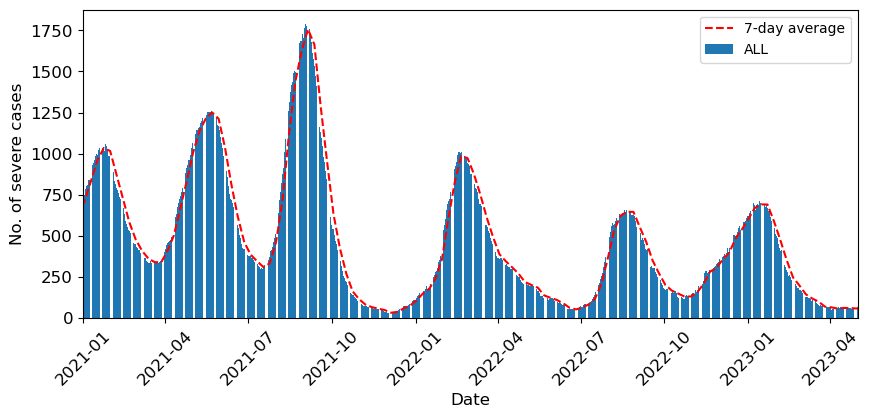

In [8]:
plt.figure(figsize=(10, 4))
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2023-05-01")

plt.bar(df_all.index, df_all["ALL"], label="ALL")
plt.plot(df_all_rolling7.index, df_all_rolling7["ALL"], "--r", label="7-day average")

plt.xlim(start_date, end_date)
plt.xlabel("Date", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("No. of severe cases", fontsize=12)
plt.tick_params(labelsize = 12)
plt.legend()
plt.show()


### 8. 

In [9]:
df_m_sum = df_all.resample("ME").sum()
display(df_m_sum.head(10))

,ALL
Date,
2020-05-31,4120
2020-06-30,2052
2020-07-31,1474
2020-08-31,5895
2020-09-30,5269
2020-10-31,4480
2020-11-30,8243
2020-12-31,18102
2021-01-31,29084


### 9.

In [10]:
display(df_m_sum[df_m_sum["ALL"]>30000])

,ALL
Date,
2021-05-31,36995
2021-08-31,38114
2021-09-30,38920


### 10.

In [11]:
df_all["day_of_week"] = df_all.index.dayofweek
display(df_all.head())

,ALL,day_of_week
Date,,
2020-05-09,248,5
2020-05-10,222,6
2020-05-11,248,0
2020-05-12,254,1
2020-05-13,241,2


### 11.

In [12]:
df_all_2022 = df_all[df_all.index.year==2022]
display(df_all_2022.head())

,ALL,day_of_week
Date,,
2022-01-01,109,5
2022-01-02,123,6
2022-01-03,134,0
2022-01-04,139,1
2022-01-05,149,2


### 12.

In [13]:
df_all_week = df_all_2022.groupby('day_of_week').mean()
display(df_all_week)

,ALL
day_of_week,
0,355.038462
1,355.480769
2,355.442308
3,357.519231
4,356.442308
5,349.773585
6,347.230769


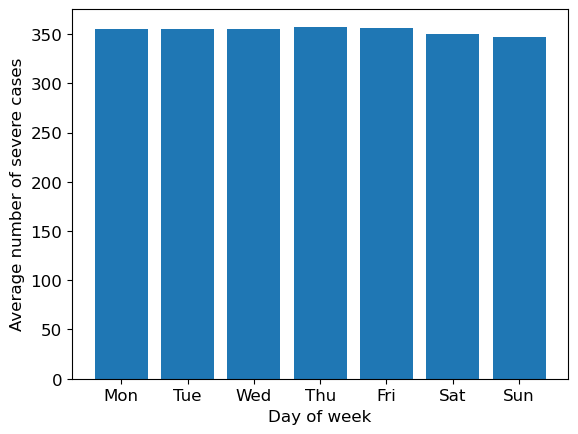

In [14]:
wday_list = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.bar(wday_list,df_all_week['ALL'])
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Average number of severe cases', fontsize=12)
plt.tick_params(labelsize = 12)
plt.show()